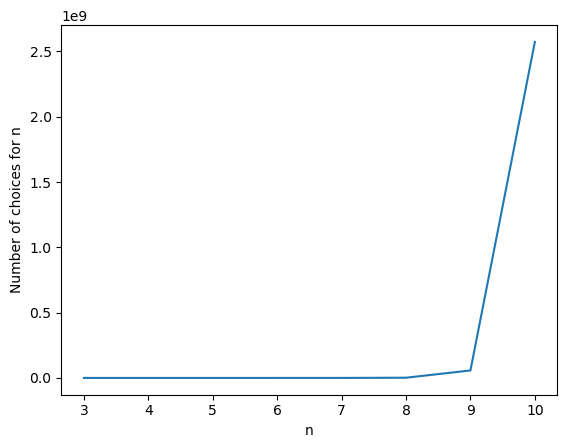

In [1]:
# Number of sequences of draws grows very fast!

import numpy as np
import math
from math import prod
from math import comb
import matplotlib.pyplot as plt

choice_list = []
for n in range(3, 11):
    Nchoice = prod(comb(n-k+1, 2) for k in range(1, n))
    choice_list.append(Nchoice)
    
x = np.array(range(3,11))   # this is only just from n=3 to n=10
y = np.array(choice_list)
    
plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('Number of choices for n')
plt.show()

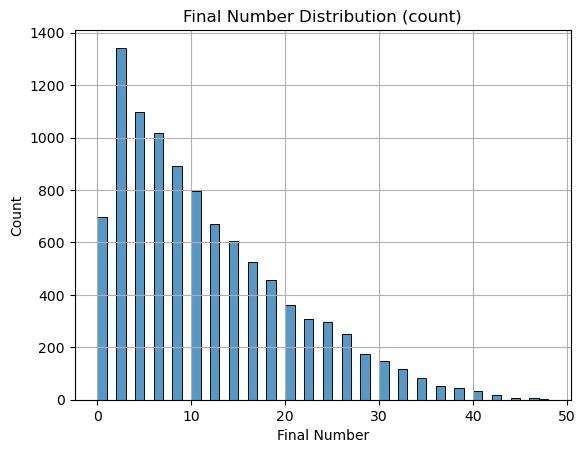

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sims = int(1e4)                # number of simulations
rng = np.random.default_rng(seed=41)  #seed

n = 48                      # number of pieces of paper in the initial hat
leftover = []               # an empty list
leftover_set = set()        # an empty set


for i in range(sims):
    hat = list(range(1, n+1))  # list of the paper in the initial hat
    while len(hat) >= 2:
        a,b = rng.choice(hat, size=2, replace=False)   # choose two numbers randomly without replacement
        hat.remove(a)
        hat.remove(b)
        d = abs(a-b)                                   # add the new number to the list
        hat.append(d)
    leftover.extend(hat)
    leftover_set.add(d)

ax = sns.histplot(leftover, bins = n, stat = 'count')   # plot the histogram using seaborn
ax.set_title(f'Final Number Distribution (count)')
ax.set_xlabel('Final Number')
ax.grid('on')
plt.show()

In [3]:
# Observaion: the possible final numbers for different n

# 3: 0, 2
# 4: 0, 2, 4

# 5: 1, 3, 5
# 6: 1, 3, 5

# 7: 0, 2, 4, 6
# 8: 0, 2, 4, 6, 8

# 9: 1, 3, 5, 7, 9
# 10: 1, 3, 5, 7, 9

# 11: 0, 2, 4, 6, 8, 10
# 12: 0, 2, 4, 6, 8, 10, 12

#...

# for a positive integer k
# (odd) n=4k-1: 0, 2, ... , n-1 (4k-2)
# (even) n=4k: 0, 2, ... , n (4k)
# (odd) n=4k+1: 1, 3, ... , n (4k+1)
# (even) n=4k+2: 1, 3, ... , n-1 (4k+1)

In [4]:
# Define a check function and create a set of the final numbers based on my conjecture

def check(n):
    if n % 4 == 0:
        check_list = set(range(0,n+1,2))
    if n % 4 == 1:
        check_list = set(range(1,n+1,2))
    if n % 4 == 2:
        check_list = set(range(1,n,2))
    if n % 4 == 3:
        check_list = set(range(0,n,2))
    return check_list

print(leftover_set == check(n))  # if return True then my guess for the set of final numbers is correct

True


In [5]:
# Can also print the possibility that each number appears

for i in range(0, n+1):
    Ncount = sum(j == i for j in leftover)
    if Ncount != 0:
        Nprob = Ncount / sims
        print('The probability of the final number being', i , 'is', Nprob) 

The probability of the final number being 0 is 0.0696
The probability of the final number being 2 is 0.1343
The probability of the final number being 4 is 0.1096
The probability of the final number being 6 is 0.1016
The probability of the final number being 8 is 0.089
The probability of the final number being 10 is 0.0796
The probability of the final number being 12 is 0.0672
The probability of the final number being 14 is 0.0606
The probability of the final number being 16 is 0.0526
The probability of the final number being 18 is 0.0457
The probability of the final number being 20 is 0.0363
The probability of the final number being 22 is 0.0307
The probability of the final number being 24 is 0.0298
The probability of the final number being 26 is 0.025
The probability of the final number being 28 is 0.0175
The probability of the final number being 30 is 0.0147
The probability of the final number being 32 is 0.0117
The probability of the final number being 34 is 0.0081
The probability o

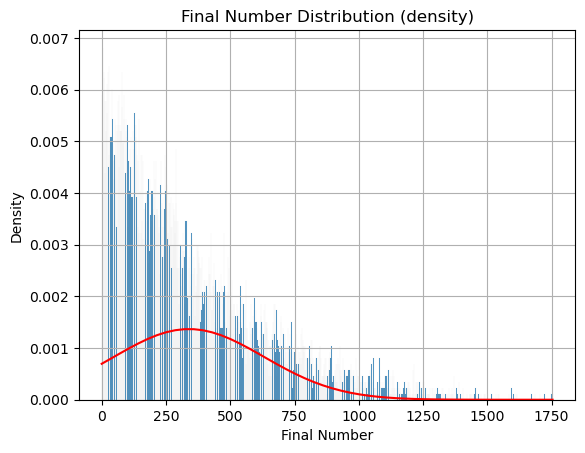

In [6]:
# Possible distribution ? for n=2024
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, skewnorm
%matplotlib inline

sims = int(1e4)   # ideally sims=10^5 or 10^6 for nicer results
rng = np.random.default_rng(seed=41)

n = 2024            
leftover = []
leftover_set = set() 

for i in range(sims):
    hat = list(range(1, n+1))
    while len(hat) >= 2:
        a,b = rng.choice(hat, size=2, replace=False)
        hat.remove(a)
        hat.remove(b)
        d = abs(a-b)                      
        hat.append(d)
    leftover.extend(hat)
    leftover_set.add(d)
    
    
ax = sns.histplot(leftover, bins = n, stat = 'density')  # density here instead of counts
ax.set_title(f'Final Number Distribution (density)')
ax.set_xlabel('Final Number')

# normal?
x = np.linspace(min(leftover), max(leftover))
MU = np.mean(leftover)
SIG = np.sqrt(np.var(leftover, ddof=1))
y = norm.pdf(x, MU, SIG)
ax.plot(x,y,'r')

# exponential?

ax.grid('on')
plt.show()

In [7]:
print(leftover_set)              
print(leftover_set == check(2024))   # it should return True if sims is large enough

{0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420,